## From Readme.md
In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your first objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analyzing.

Your next objective is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

In [ ]:
# Install additional tools
# !pip install citipy

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import scipy.stats as st

# Import API key
from api_keys import weather_api_key
# print([weather_api_key])
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print([cities])


613
[['carnarvon', 'hilo', 'georgetown', 'lata', 'mar del plata', 'east london', 'busselton', 'kapaa', 'belushya guba', 'puerto ayora', 'jamestown', 'powell', 'bredasdorp', 'saint-pierre', 'bengkulu', 'gravdal', 'bambous virieux', 'longyearbyen', 'samarkand', 'taolanaro', 'ushuaia', 'morehead', 'nuuk', 'rikitea', 'kuala terengganu', 'butaritari', 'ilulissat', 'port blair', 'mataura', 'illoqqortoormiut', 'takoradi', 'alofi', 'zaysan', 'peterhead', 'hermanus', 'guerrero negro', 'arraial do cabo', 'cabo san lucas', 'praia da vitoria', 'alice springs', 'kyzyl-suu', 'semenivka', 'newport', 'lixourion', 'chodavaram', 'matagami', 'bengbu', 'hobart', 'sandane', 'albany', 'mitsamiouli', 'provideniya', 'barrow', 'tuktoyaktuk', 'upernavik', 'kodiak', 'denia', 'tessalit', 'sambava', 'san cristobal', 'barentsburg', 'san quintin', 'kerouane', 'maiduguri', 'clyde river', 'media luna', 'atuona', 'cape town', 'paragominas', 'saint george', 'tasiilaq', 'narsaq', 'esperance', 'yellowknife', 'atar', 'vain

In [3]:
cities[0]

'carnarvon'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
#Base testing to ensure API call is working before attempting bulk

# Save config information
#url = "http://api.openweathermap.org/data/2.5/weather?"
#city = cities[0]

# Build query URL
#query_url = url + "units=imperial&appid=" + weather_api_key + "&q=" + city

#weather_df = pd.DataFrame(columns = ["City","Cloudiness", "Country",
#                                     "Date", "Humidity", 
#                                     "Lat","Lng", "Max Temp", "Wind Speed"])

# Get weather data
#weather_response = requests.get(query_url).json()
#weather_json = weather_response.json()

# Get the temperature from the response
#print(f"The weather API responded with: {weather_response}.")
#print('')
#print(f"City: {weather_response['name']}")
#print(f"Cloudiness: {weather_response['clouds']['all']}")
#print(f"Country: {weather_response['sys']['country']}")
#print(f"Date: {weather_response['dt']}")
#print(f"Humidity: {weather_response['main']['humidity']}")
#print(f"Lat: {weather_response['coord']['lat']}")
#print(f"Lng: {weather_response['coord']['lon']}")
#print(f"Max Temp: {weather_response['main']['temp_max']}")
#print(f"Wind Speed: {weather_response['wind']['speed']}")

#index = 0

#weather_df.at[index,'City'] = weather_response['name']
#weather_df.at[index,'Cloudiness'] = weather_response['clouds']['all']
#weather_df.at[index,'Country'] = weather_response['sys']['country']
#weather_df.at[index,'Date'] = weather_response['dt']
#weather_df.at[index,'Humidity'] = weather_response['main']['humidity']
#weather_df.at[index,'Lat'] = weather_response['coord']['lat']
#weather_df.at[index,'Lng'] = weather_response['coord']['lon']
#weather_df.at[index,'Max Temp'] = weather_response['main']['temp_max']
#weather_df.at[index,'Wind Speed'] = weather_response['wind']['speed']

#weather_df.head()

In [5]:
# loop to limit 50 API calls per minute. The OpenWeatherMap API used to be a limit of 60 calls/min and they will throttle 
# or block access if you make too many calls in a short time. So Need to get current time at process kick off.
t0 =time.time()

#It makes sense that since the next step calls for the raw data to be converted to a dataframe then maybe it is best to build the dataframe on import
weather_df = pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                     "Date", "Humidity", 
                                     "Lat","Lng", "Max Temp", "Wind Speed"])

# If reran after Kernel restart uncomment the following
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "units=imperial&appid=" + weather_api_key + "&q="

print("Beginning Data Retrieval")
print("-----------------------------")
counter = 1 #Counter for the record currently processing
setnumber = 1 #in the demo output the sets were in in blocks of 50 this is assumed to be because of the aforementioned limit
indexnumber = 0 #sets the initial index position for the df
error_count = 0 #checking to ensure we have 500 data points to meet the requirement "Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude."

for city in cities:
    try:
        print(f'Processing Record {counter} of Set {setnumber} | {city}' )
        #print({query_url})
        weather_response = requests.get(query_url+city).json()
        weather_df.at[indexnumber,'City'] = weather_response['name']
        weather_df.at[indexnumber,'Cloudiness'] = weather_response['clouds']['all']
        weather_df.at[indexnumber,'Country'] = weather_response['sys']['country']
        weather_df.at[indexnumber,'Date'] = weather_response['dt']
        weather_df.at[indexnumber,'Humidity'] = weather_response['main']['humidity']
        weather_df.at[indexnumber,'Lat'] = weather_response['coord']['lat']
        weather_df.at[indexnumber,'Lng'] = weather_response['coord']['lon']
        weather_df.at[indexnumber,'Max Temp'] = weather_response['main']['temp_max']
        weather_df.at[indexnumber,'Wind Speed'] = weather_response['wind']['speed']
        indexnumber += 1 
    except:
        print("City not found. Skipping...")
        error_count += 1
    counter += 1
    if counter == 51:
        t1=time.time()
        counter = 1 
        setnumber += 1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
print(f'Could not get data for {error_count} cities. DataFrame built for {len(cities)-error_count} cities')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | lata
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | powell
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | saint-pierre
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | gravdal
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | samarkand
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | ushuaia
Processing 

City not found. Skipping...
Processing Record 35 of Set 4 | naron
Processing Record 36 of Set 4 | shenjiamen
Processing Record 37 of Set 4 | iralaya
Processing Record 38 of Set 4 | vila
Processing Record 39 of Set 4 | jacareacanga
Processing Record 40 of Set 4 | sitka
Processing Record 41 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 42 of Set 4 | chavakkad
Processing Record 43 of Set 4 | saint anthony
Processing Record 44 of Set 4 | maldonado
Processing Record 45 of Set 4 | lebu
Processing Record 46 of Set 4 | heihe
Processing Record 47 of Set 4 | kirovskiy
Processing Record 48 of Set 4 | karasuk
Processing Record 49 of Set 4 | shakawe
Processing Record 50 of Set 4 | pyu
Processing Record 1 of Set 5 | coquimbo
Processing Record 2 of Set 5 | kaeo
Processing Record 3 of Set 5 | monaragala
Processing Record 4 of Set 5 | constitucion
Processing Record 5 of Set 5 | maltahohe
Processing Record 6 of Set 5 | norman wells
Processing Record 7 of Set 5 | maceio
Processing Rec

Processing Record 23 of Set 8 | aksu
Processing Record 24 of Set 8 | lufilufi
Processing Record 25 of Set 8 | sahuaripa
Processing Record 26 of Set 8 | brunswick
Processing Record 27 of Set 8 | kalia
Processing Record 28 of Set 8 | champerico
Processing Record 29 of Set 8 | noumea
Processing Record 30 of Set 8 | wana
Processing Record 31 of Set 8 | krasnyy chikoy
Processing Record 32 of Set 8 | igarka
Processing Record 33 of Set 8 | iqaluit
Processing Record 34 of Set 8 | the valley
Processing Record 35 of Set 8 | kumphawapi
Processing Record 36 of Set 8 | ahipara
Processing Record 37 of Set 8 | xai-xai
Processing Record 38 of Set 8 | san lorenzo
Processing Record 39 of Set 8 | carballo
Processing Record 40 of Set 8 | benguela
Processing Record 41 of Set 8 | bowen
Processing Record 42 of Set 8 | novopokrovka
Processing Record 43 of Set 8 | hay river
Processing Record 44 of Set 8 | rodrigues alves
Processing Record 45 of Set 8 | ouesso
Processing Record 46 of Set 8 | vardo
Processing Re

Processing Record 11 of Set 12 | kourou
Processing Record 12 of Set 12 | kuching
Processing Record 13 of Set 12 | puerto escondido
Processing Record 14 of Set 12 | canutama
Processing Record 15 of Set 12 | mocuba
Processing Record 16 of Set 12 | yerbogachen
Processing Record 17 of Set 12 | ukiah
Processing Record 18 of Set 12 | bima
Processing Record 19 of Set 12 | xam nua
Processing Record 20 of Set 12 | ambon
Processing Record 21 of Set 12 | batagay-alyta
Processing Record 22 of Set 12 | aleksandrov gay
Processing Record 23 of Set 12 | bontang
Processing Record 24 of Set 12 | xinzhou
Processing Record 25 of Set 12 | tupang
Processing Record 26 of Set 12 | basco
Processing Record 27 of Set 12 | aninoasa
Processing Record 28 of Set 12 | mayfield
Processing Record 29 of Set 12 | lorengau
Processing Record 30 of Set 12 | tawkar
City not found. Skipping...
Processing Record 31 of Set 12 | lagoa
Processing Record 32 of Set 12 | mumford
Processing Record 33 of Set 12 | pavelets
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df.to_csv(output_data_file, encoding='utf-8', index=False)

In [7]:
weather_df.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

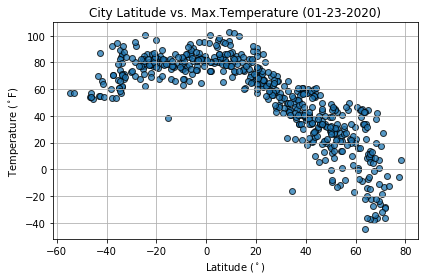

In [8]:
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df['Lat'], weather_df['Max Temp'], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Max.Temperature ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("Fig1.png")
plt.show()

### Analysis:
This scatterplot is looking at the relationship between latitude and max temp. The southern latitudes (<0) currently have higher  max temps on average than the northern latitudes (>0).

#### Latitude vs. Humidity Plot

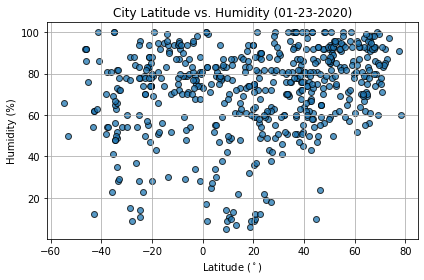

In [9]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("Fig2.png")
plt.show()

### Analysis:
This scatterplot is looking at the relationship between latitude and humidity.

#### Latitude vs. Cloudiness Plot

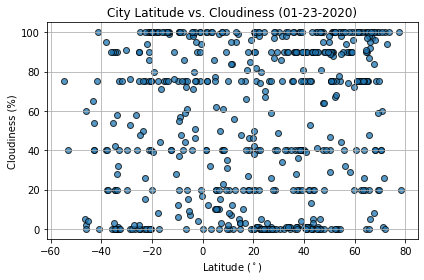

In [10]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("Fig3.png")
plt.show()

### Analysis:
This scatterplot is looking at the relationship between latitude and cloudiness. There are some interesting biases at 0%, 20%, 40%, 75%, 90% (in the norhtern latitudes) and 100%. Perhaps % cloudiness is subjective.

#### Latitude vs. Wind Speed Plot

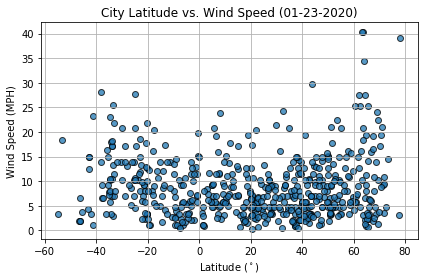

In [11]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("Fig4.png")
plt.show()

### Analysis:
This scatterplot is looking at the relationship between latitude and wind speed. It looks like the average wind speed is below 15 MPH.

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
#x_values = northern_df or southern_df.iloc[:,0]
#y_values = northern_df or southern_df.iloc[:,1]
#print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(x_values,y_values)[0],2)}")
#(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel('Weight (g)')
#plt.ylabel('Tumor Volume (mm3)')
#plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[weather_df['Lat']>=0,]
#print([northern_df])
southern_df = weather_df.loc[weather_df['Lat']<=0,]
#print([southern_df.dtypes])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between Max Temp. and Latitude is -0.87


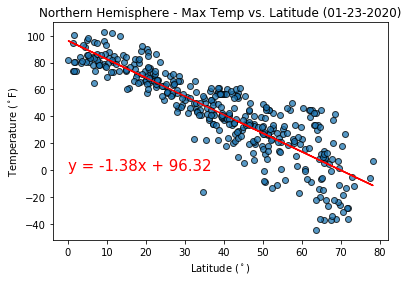

In [26]:
x_values = northern_df.iloc[:,5].astype(float)
y_values = northern_df.iloc[:,7].astype(float)
print(f"The correlation coefficient between Max Temp. and Latitude is {round(st.pearsonr(x_values,y_values)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title(f"Northern Hemisphere - Max. Temp vs. Latitude ({date})")
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between Max Temp. and Latitude is 0.47


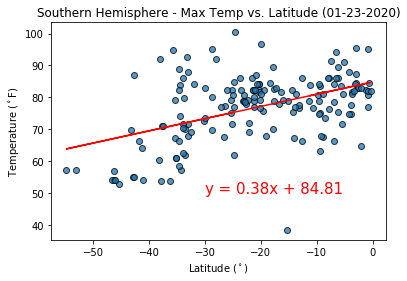

In [27]:
x_values = southern_df.iloc[:,5].astype(float)
y_values = southern_df.iloc[:,7].astype(float)
print(f"The correlation coefficient between Max. Temp. and Latitude is {round(st.pearsonr(x_values,y_values)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Max. Temp vs. Latitude ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.show()

##### Max. Temp vs. Latitude Analysis
There is a very strong negative correlation between Max. Temp and Latitude in the northern hemisphere but a moderate positive correlation in the southern hemispere. 

A positive relationship means that larger scores on one variable are associated with larger scores in the other variable.

A negative, or inverse, relationship means that larger scores on one variable are associated with smaller scores on the other variable.

Generally speaking it is warmest at the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between Humidity and Latitude is 0.37


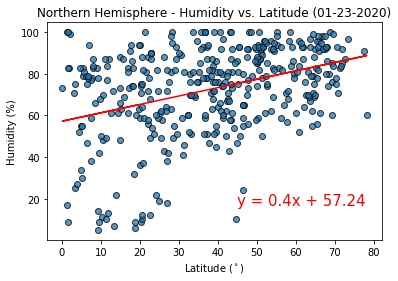

In [36]:
x_values = northern_df.iloc[:,5].astype(float)
y_values = northern_df.iloc[:,4].astype(float)
print(f"The correlation coefficient between Humidity and Latitude is {round(st.pearsonr(x_values,y_values)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,17),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Humidity vs. Latitude ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between Humidity and Latitude is 0.22


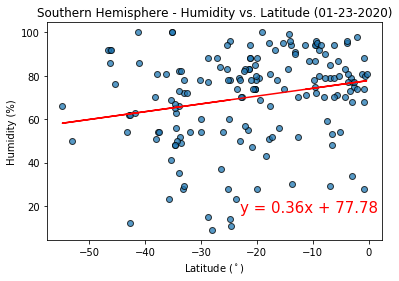

In [37]:
x_values = southern_df.iloc[:,5].astype(float)
y_values = southern_df.iloc[:,4].astype(float)
print(f"The correlation coefficient between Humidity and Latitude is {round(st.pearsonr(x_values,y_values)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-23,17),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Humidity vs. Latitude ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.show()

##### Humidity vs. Latitude Analysis
There is a weak positive correlation between Humidity and Latitude in both hemispheres.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between Cloudiness and Latitude regimen is 0.25


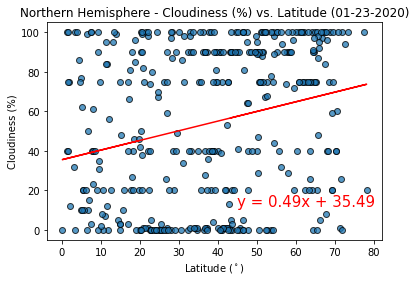

In [33]:
x_values = northern_df.iloc[:,5].astype(float)
y_values = northern_df.iloc[:,1].astype(float)
print(f"The correlation coefficient between Cloudiness and Latitude regimen is {round(st.pearsonr(x_values,y_values)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,12),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between Cloudiness and Latitude is 0.31


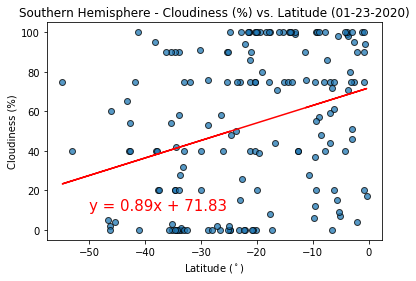

In [35]:
x_values = southern_df.iloc[:,5].astype(float)
y_values = southern_df.iloc[:,1].astype(float)
print(f"The correlation coefficient between Cloudiness and Latitude is {round(st.pearsonr(x_values,y_values)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")
plt.show()

##### Cloudiness vs. Latitude Analysis
There is a weak positive correlation between percentage of Cloudiness and Latitude in both hemispheres. The lateral lines at specific break points (20%,40%,75%,90%) are likely due to rounding and subjective metrics used to determine cloudiness. Meteorlogical standards seem to not use straight percentage: 

"Cloud amount is reported in oktas or eighths with the additional convention that:

0 oktas represents the complete absence of cloud
1 okta represents a cloud amount of 1 eighth or less, but not zero
7 oktas represents a cloud amount of 7 eighths or more, but not full cloud cover
8 oktas represents full cloud cover with no breaks
9 oktas represents sky obscured by fog or other meteorological phenomena"

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between Wind Speed and Latitude is 0.21


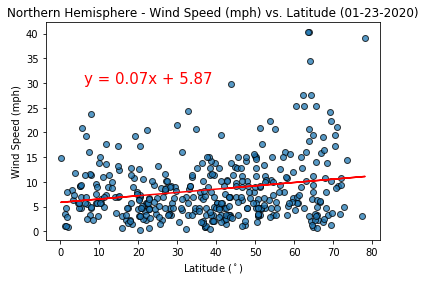

In [40]:
x_values = northern_df.iloc[:,5].astype(float)
y_values = northern_df.iloc[:,8].astype(float)
print(f"The correlation coefficient between Wind Speed and Latitude is {round(st.pearsonr(x_values,y_values)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between Wind Speed and Latitude is -0.23


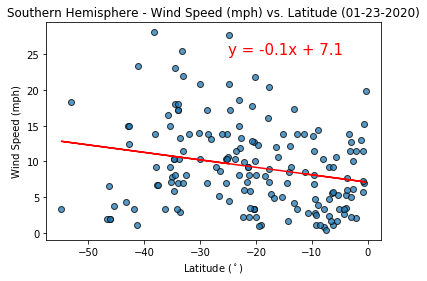

In [39]:
x_values = southern_df.iloc[:,5].astype(float)
y_values = southern_df.iloc[:,8].astype(float)
print(f"The correlation coefficient between Wind Speed and Latitude is {round(st.pearsonr(x_values,y_values)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (mph)")
plt.show()

##### Wind Speed vs. Latitude Analysis
There is a weak positive correlation between the wind speed and Latitude in the northern hemisphere and weak negative with the southern. One may conclude that wind speed may increase a little the further you travel from the equator.